<a href="https://colab.research.google.com/github/aanilkumarreddy/DataDiggers/blob/main/datamodelingNFLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('NFLX.csv')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [ ]:
dataset['Data'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape

(756, 8)

In [ ]:
dataset.drop('Adj Close', axis = 1, inplace = True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Data
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,11679500,2019-01-02
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,14969600,2019-01-03
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,19330100,2019-01-04
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,18620100,2019-01-07
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,15359200,2019-01-08


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Data      0
dtype: int64

In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
Data      False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    756 non-null    object        
 1   Open    756 non-null    float64       
 2   High    756 non-null    float64       
 3   Low     756 non-null    float64       
 4   Close   756 non-null    float64       
 5   Volume  756 non-null    int64         
 6   Data    756 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 41.5+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,444.221494,450.604735,437.795054,444.433266,6.241924e+06
std,108.166550,109.087548,106.854881,107.807960,4.237614e+06
min,255.710007,265.000000,252.279999,254.589996,1.144000e+06
25%,351.932502,357.552491,346.879997,352.204994,3.702150e+06
50%,468.115005,477.699997,460.934998,469.000000,5.185750e+06
75%,520.127487,529.077499,514.324997,522.909988,7.416525e+06
max,692.349976,700.989990,686.090027,691.690002,3.825890e+07


In [ ]:
print(len(dataset))

756


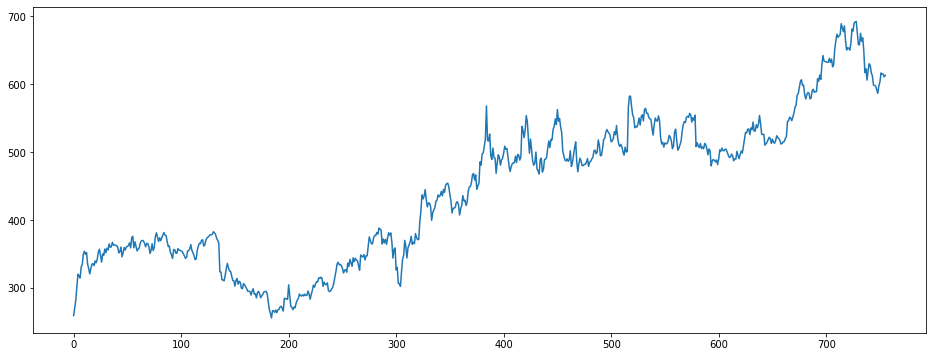

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(567, 4)

In [ ]:
X_test.shape

(189, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-5.54257418e-01  8.27149802e-01  7.25650758e-01 -2.59160182e-08]


In [ ]:
print(regressor.intercept_)

0.5514103020061043


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

           Open        High         Low   Volume
650  519.000000  519.849976  510.510010  2096600
734  668.200012  675.380005  640.010010  5608900
404  493.350006  497.459991  478.630005  4691200
79   368.350006  375.140015  366.239990  5621900
422  545.000000  554.000000  521.320007  9071100
..          ...         ...         ...      ...
457  488.109985  490.059998  481.350006  4927900
144  329.200012  329.649994  323.230011  6029300
608  499.820007  503.220001  495.820007  2269000
21   337.179993  346.839996  336.500000  9827800
735  649.479980  654.520020  617.070007  3882800

[189 rows x 4 columns]


In [ ]:
predicted.shape

(189,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [ ]:
print(dfr)

     Actual Price  Predicted Price
650    515.150024       513.283255
734    641.900024       653.115423
404    483.380005       485.779092
79     374.850006       372.304305
422    525.750000       534.783279
..            ...              ...
457    488.279999       484.530146
144    325.929993       325.155636
608    499.239990       499.494149
21     339.850006       344.482315
735    617.770020       629.635110

[189 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual Price,Predicted Price
650,515.150024,513.283255
734,641.900024,653.115423
404,483.380005,485.779092
79,374.850006,372.304305
422,525.750000,534.783279
40,357.320007,357.151801
669,558.919983,559.955545
27,345.730011,348.507928
701,629.760010,624.433110
170,293.250000,290.542309


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9982658794030888

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.1013126719607764


In [ ]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 19.399699385083693


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 4.404508983426381


In [ ]:
graph=dfr.head(20)

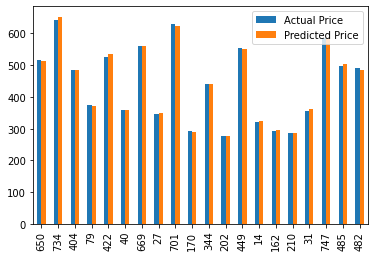

In [ ]:
graph.plot(kind='bar')